# Project: Wrangling and Analyze Data

In [45]:
import pandas as pd
import requests
import os
import numpy as np 
import matplotlib.pyplot as plt
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
%matplotlib inline

## Data Gathering

1. Manually download the twitter-archive-enhanced.csv file and read it into a dataframe

In [46]:
# Read manually downloaded file

weratedogs_archive = pd.read_csv("twitter-archive-enhanced.csv")
weratedogs_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [47]:
# Initiate the download request

uri = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(uri)

# Download file to the folder created
with open(os.path.join(uri.split('/')[-1]),mode='wb') as file:
    file.write(response.content)

In [48]:
# Read the TSV file

weratedogs_image_predictions = pd.read_csv("image-predictions.tsv",sep="\t")
weratedogs_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
# Query twitter API for each tweet in the twitter archive ans save JSON in a text file

# Twitter access credentials hidden

client_key = ""
client_secret = ""
access_token = ""
access_secret = ""


auth = OAuthHandler(client_key,client_secret)
auth.set_access_token(access_token,access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API

tweet_ids = weratedogs_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt','w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count+=1
        print(str(count)+": "+str(tweet_id))
        try:
            tweet = api.get_status(tweet_id,tweet_mode='extended')
            print('Success')
            json.dump(tweet._json,outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

4. Create a `weratedogs_tweets` dataframe by rading the Json objects in the `tweet_json.txt` file. 

In [51]:
# Import the libraries
import json
import pandas as pd

df_list = []

# Read the text file
with open('tweet_json.txt',encoding='utf-8') as file:
  
    for x in file.readlines():
        jsonObject = json.loads(x)
        
        id = jsonObject['id']
        retweet_count = jsonObject['retweet_count']
        favourites_count = jsonObject['favorite_count']
        retweeted = jsonObject['retweeted']
        in_reply_to_user_id = jsonObject['in_reply_to_user_id']


        df_list.append({
            'tweet_id': id,
            'retweet_count':retweet_count,
            'favourite_count':favourites_count,        
            'retweeted':retweeted,
            'in_reply_to_user_id':in_reply_to_user_id
            
        })

# Create the dataframe
weratedogs_tweets = pd.DataFrame(df_list,columns=['tweet_id','retweet_count','favourite_count','retweeted','in_reply_to_user_id'])

In [52]:
# View the dataframe
weratedogs_tweets

,tweet_id,retweet_count,favourite_count,retweeted,in_reply_to_user_id
0,892420643555336193,8853,39467,False,NaN
1,892177421306343426,6514,33819,False,NaN
2,891815181378084864,4328,25461,False,NaN
3,891689557279858688,8964,42908,False,NaN
4,891327558926688256,9774,41048,False,NaN
...,...,...,...,...,...
2349,666049248165822465,41,111,False,NaN
2350,666044226329800704,147,311,False,NaN
2351,666033412701032449,47,128,False,NaN
2352,666029285002620928,48,132,False,NaN


## Assessing Data


1. WeRateDogs twitter archive enhanced table

In [53]:
# View the WeRateDogs archived Enhanced dataframe
weratedogs_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [54]:
# Randomly sample the data from the WeRateDogs Archived Enhanced dataframe
weratedogs_archive.sample(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
257,843856843873095681,NaN,NaN,2017-03-20 16:08:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Sadie and Daisy. They do all thei...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/843856843...,12,10,Sadie,None,None,None,None
1762,678643457146150913,NaN,NaN,2015-12-20 18:29:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizz. He just arrived. Couldn't wait unt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678643457...,10,10,Grizz,None,None,None,None
1996,672591762242805761,NaN,NaN,2015-12-04 01:42:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Taz. He boxes leaves. 10/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672591762...,10,10,Taz,None,None,None,None
2050,671497587707535361,NaN,NaN,2015-12-01 01:14:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pip. He is a ship captain. Many years ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671497587...,11,10,Pip,None,None,None,None
1837,676089483918516224,NaN,NaN,2015-12-13 17:21:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Yes hello I'ma just snag this here toasted ba...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/676089483...,9,10,None,None,None,None,None
330,833124694597443584,NaN,NaN,2017-02-19 01:23:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gidget. She's a spy pupper. Stealthy a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/833124694...,12,10,Gidget,None,None,pupper,None
1538,689835978131935233,NaN,NaN,2016-01-20 15:44:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Fynn &amp; Taco. Fynn is an all-powerful ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689835978...,11,10,Fynn,None,None,None,None
283,838952994649550848,NaN,NaN,2017-03-07 03:22:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",SHE MISPLACED HER HOOMAN 13/10 MISTAKES HAPPEN...,NaN,NaN,NaN,https://twitter.com/ktla/status/83894871422799...,13,10,None,None,None,None,None
2176,669203728096960512,NaN,NaN,2015-11-24 17:19:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Samsom. He is sexually confused. Reall...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669203728...,9,10,Samsom,None,None,None,None
1742,679462823135686656,NaN,NaN,2015-12-23 00:45:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Hurley. He's the curly one. He hugs every...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679462823...,11,10,Hurley,None,None,None,None


In [55]:
# Show a summary of the WeRateDogs Archived Enhanced dataframe
weratedogs_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [56]:
# Show Summary statistics for the WeRateDogs Archived Enhanced dataframe
weratedogs_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [57]:
# View the max value of the rating denominator
weratedogs_archive[weratedogs_archive.rating_denominator > 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [58]:
# Check for retweeted tweets
weratedogs_archive[weratedogs_archive.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [59]:
# Inspect the number of rows for which the retweeted_status_id, retweeted_status_timestamp, retweeted_status_user_id are not null
sum(weratedogs_archive.retweeted_status_id.isnull()),sum(weratedogs_archive.retweeted_status_timestamp.isnull()),sum(weratedogs_archive.retweeted_status_user_id.isnull())

(2175, 2175, 2175)

In [60]:
# Inspect the source column of the dataframe
weratedogs_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [61]:
# Inspect the name column of the dataframe
weratedogs_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [62]:
# Use regex to be more concise with the names in the name field
weratedogs_archive[weratedogs_archive.name.str.contains(r'^[^A-Z].*$')].name.value_counts()

a               55
the              8
an               7
very             5
just             4
quite            4
one              4
getting          2
actually         2
mad              2
not              2
old              1
life             1
officially       1
light            1
by               1
infuriating      1
such             1
all              1
unacceptable     1
this             1
his              1
my               1
incredibly       1
space            1
Name: name, dtype: int64

In [63]:
# Check for duplicate values in the weratedogs_archive dataframe
weratedogs_archive.duplicated().value_counts()

False    2356
dtype: int64

2. WeRateDogs Image predictions dataframe

In [64]:
# View the Image Predictions dataframe
weratedogs_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [65]:
# Randomly sample 20 rows from the Image Predictions dataframe
# Inspect the sample
weratedogs_image_predictions.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1451,776477788987613185,https://pbs.twimg.com/media/CsaaaaxWgAEfzM7.jpg,1,Labrador_retriever,0.884839,True,Chesapeake_Bay_retriever,0.057565,True,paintbrush,0.005766,False
853,696405997980676096,https://pbs.twimg.com/media/Caohi_hWcAAQCni.jpg,1,borzoi,0.132845,True,Walker_hound,0.086005,True,Great_Pyrenees,0.065582,True
1587,798209839306514432,https://pbs.twimg.com/media/CxPPnCYWIAAo_ao.jpg,1,Pekinese,0.524583,True,Shih-Tzu,0.102931,True,Pomeranian,0.097893,True
874,698178924120031232,https://pbs.twimg.com/media/CbBuBhbWwAEGH29.jpg,1,Chesapeake_Bay_retriever,0.351868,True,malinois,0.207753,True,Labrador_retriever,0.154606,True
2040,885167619883638784,https://pbs.twimg.com/media/DEi_N9qXYAAgEEw.jpg,4,malamute,0.812482,True,Siberian_husky,0.071712,True,Eskimo_dog,0.055770,True
1062,715220193576927233,https://pbs.twimg.com/media/Cez49UqWsAIRQXc.jpg,1,Chihuahua,0.584026,True,Italian_greyhound,0.377077,True,Boston_bull,0.017400,True
1098,720389942216527872,https://pbs.twimg.com/media/Cf9W1J-UMAErahM.jpg,1,Pembroke,0.873977,True,Cardigan,0.043339,True,Eskimo_dog,0.019197,True
1231,745789745784041472,https://pbs.twimg.com/media/ClmT0KHWkAAXbhy.jpg,1,Pekinese,0.984267,True,Shih-Tzu,0.008942,True,cocker_spaniel,0.001928,True
1094,719991154352222208,https://pbs.twimg.com/media/Cf3sH62VAAA-LiP.jpg,2,golden_retriever,0.605304,True,cocker_spaniel,0.130948,True,Labrador_retriever,0.094692,True
1555,793195938047070209,https://pbs.twimg.com/media/CwH_foYWgAEvTyI.jpg,2,Labrador_retriever,0.654762,True,golden_retriever,0.074100,True,Chihuahua,0.042339,True


In [66]:
# View summary of the Image Prediction dataframe

weratedogs_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [67]:
# Summary statistics of the Image Predictions dataframe
weratedogs_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [68]:
# Check if the prediction confidence is at least true for p1_conf, p2_conf, p3_conf
df_check = weratedogs_image_predictions.query('p1_dog == False and p2_dog == False and p3_dog == False')
df_check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 6 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  324 non-null    int64  
 1   jpg_url   324 non-null    object 
 2   img_num   324 non-null    int64  
 3   p1        324 non-null    object 
 4   p1_conf   324 non-null    float64
 5   p1_dog    324 non-null    bool   
 6   p2        324 non-null    object 
 7   p2_conf   324 non-null    float64
 8   p2_dog    324 non-null    bool   
 9   p3        324 non-null    object 
 10  p3_conf   324 non-null    float64
 11  p3_dog    324 non-null    bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 26.3+ KB


In [69]:
# Check for duplicate values in the weratedogs_image_predictions dataframe
weratedogs_image_predictions.duplicated().value_counts()

False    2075
dtype: int64

3. WeRateDogs Tweets dataframe

In [70]:
# View the tweets dataframe
weratedogs_tweets

,tweet_id,retweet_count,favourite_count,retweeted,in_reply_to_user_id
0,892420643555336193,8853,39467,False,NaN
1,892177421306343426,6514,33819,False,NaN
2,891815181378084864,4328,25461,False,NaN
3,891689557279858688,8964,42908,False,NaN
4,891327558926688256,9774,41048,False,NaN
...,...,...,...,...,...
2349,666049248165822465,41,111,False,NaN
2350,666044226329800704,147,311,False,NaN
2351,666033412701032449,47,128,False,NaN
2352,666029285002620928,48,132,False,NaN


In [71]:
# Summary of the tweets dataframe
weratedogs_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             2354 non-null   int64  
 1   retweet_count        2354 non-null   int64  
 2   favourite_count      2354 non-null   int64  
 3   retweeted            2354 non-null   bool   
 4   in_reply_to_user_id  78 non-null     float64
dtypes: bool(1), float64(1), int64(3)
memory usage: 76.0 KB


In [72]:
#  Check for duplicated columns in the tweets dataframe

sum(weratedogs_tweets.duplicated())

0

In [73]:
# Check for retweeted tweets in the weratedogs_tweets dataframe
weratedogs_tweets.retweeted.value_counts()

False    2354
Name: retweeted, dtype: int64

In [74]:
# Check for replies to tweets
weratedogs_tweets.in_reply_to_user_id.value_counts()

4.196984e+09    47
2.195506e+07     2
2.281182e+09     1
1.132119e+08     1
1.637468e+07     1
4.670367e+08     1
1.198989e+09     1
2.878549e+07     1
2.319108e+09     1
3.589728e+08     1
4.717297e+09     1
1.584641e+07     1
7.305050e+17     1
2.916630e+07     1
2.918590e+08     1
1.185634e+07     1
2.068372e+07     1
1.582854e+09     1
4.738443e+07     1
3.058208e+07     1
2.625958e+07     1
2.894131e+09     1
8.405479e+17     1
1.361572e+07     1
1.943518e+08     1
2.792810e+08     1
1.806710e+08     1
7.759620e+07     1
1.648776e+07     1
3.105441e+09     1
2.143566e+07     1
Name: in_reply_to_user_id, dtype: int64

In [75]:
sum(weratedogs_tweets.in_reply_to_user_id.notnull())

78

In [76]:
sum(weratedogs_tweets.in_reply_to_user_id.duplicated())

2322

In [77]:
# Check for duplicated columns across the 3 datasets

all_cols = pd.Series(list(weratedogs_archive) + list(weratedogs_image_predictions) + list(weratedogs_tweets))

all_cols[all_cols.duplicated()]

17               tweet_id
29               tweet_id
33    in_reply_to_user_id
dtype: object

### **Quality issues**

#### WeRateDogs Twitter archive enhanced table
1. Tweet source in the ```source``` column is embedded in html anchor tags.
2. `name` column contains names wrong names, `a`,`an`,`None`,`by`,`his`,`not`,`this`,`very`,`not`,`my`,`such`,`the`,`just`,`quite`,`getting`,`not`
3. Invalid datatype for `timestamp` and `retweeted_timestamp` columns
4. Retweeted pictures in the table
5. Missing data in ```in_reply_to_status_id```, ```in_reply_to_user_id```,  ```retweeted_status_id``` , ```retweeted_status_user_id``` columns
6. `floofer` column should be renamed to `floof`

####  WeRateDogs Image predictions table 
7. Inconsistent prediction naming convention in `p1`,`p2`,`p3` columns.
8. Non dog images in the dataframe

#### WeRateDogs Tweets table
9. Reply tweets in the tweets table.

### **Tidiness issues**
1. The `doggo`, `floof`, `pupper`, `puppo` are untidy
2. Tweets and Image prediction tables should be part of the twitter archive table


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

In [78]:
# Make copies of original pieces of data

weratedogs_archive_copy = weratedogs_archive.copy()
weratedogs_tweets_copy = weratedogs_tweets.copy()
weratedogs_image_predictions_copy = weratedogs_image_predictions.copy()

### Issue #1: Tweet source in the ```source``` column is embedded in html anchor tags.

#### Define: Extract the tweet source into a `tweet_source` column from the source column using a regular expression. Drop the source column.

#### Code

In [79]:
# Create new column tweet_source by extracting 
weratedogs_archive_copy['tweet_source'] = weratedogs_archive_copy.source.str.extract("\>(.*)\<")

# Drop the source column
weratedogs_archive_copy.drop('source',axis=1,inplace=True)

#### Test

In [80]:
weratedogs_archive_copy.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_source
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,Twitter for iPhone
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,Twitter for iPhone
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,Twitter for iPhone
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,Twitter for iPhone
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,Twitter for iPhone
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,Twitter for iPhone
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,Twitter for iPhone
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,Twitter for iPhone
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,Twitter for iPhone
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,Twitter for iPhone


### Issue #2: name column contains names wrong names, `a`,`an`,`None`,`by`,`his`,`not`,`this`,`very`,`not`,`my`,`such`,`the`,`just`,`quite`,`getting`,`not`

#### Define: Replace the wrong names with a null value. 

#### Code

In [81]:
name_list = ['a','an','None','by','his','not','this','very','not','my','such','the','just','quite','getting','not']
for i in name_list:
    weratedogs_archive_copy.name.replace(i,np.nan,inplace=True)

#### Test

In [82]:
weratedogs_archive_copy.name.value_counts()

Charlie       12
Cooper        11
Lucy          11
Oliver        11
Tucker        10
              ..
Dex            1
Ace            1
Tayzie         1
Grizzie        1
Christoper     1
Name: name, Length: 943, dtype: int64

### Issue #3: Invalid datatype for `timestamp` and `retweeted_status_timestamp` columns

#### Define: Convert the timestamp and retweeted_timestamp from string to datetime.

#### Code

In [83]:
weratedogs_archive_copy.timestamp = pd.to_datetime(weratedogs_archive_copy.timestamp)
weratedogs_archive_copy.retweeted_status_timestamp = pd.to_datetime(weratedogs_archive_copy.retweeted_status_timestamp)

#### Test

In [84]:
weratedogs_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   text                        2356 non-null   object             
 5   retweeted_status_id         181 non-null    float64            
 6   retweeted_status_user_id    181 non-null    float64            
 7   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 8   expanded_urls               2297 non-null   object             
 9   rating_numerator            2356 non-null   int64              
 10  rating_denominator          2356 non-null   int64           

### Issue #4: Retweeted pictures in the table

#### Define: Identify the rows with retweeted pictures and remove them from the dataset, then drop the `retweeted_status_timestamp` , `retweeted_userid`, and the `retweeted_status_user_id` columns

#### Code

In [85]:
# Only return dataframe in which retweeted_status_id is null
weratedogs_archive_copy = weratedogs_archive_copy[weratedogs_archive_copy.retweeted_status_id.isnull()]

In [86]:
# Drop the 'retweeted_status_timestamp','retweeted_status_user_id','retweeted_status_id'columns
weratedogs_archive_copy.drop(['retweeted_status_timestamp','retweeted_status_user_id','retweeted_status_id'],axis=1,inplace=True)

#### Test

In [87]:
weratedogs_archive_copy

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_source
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,Twitter for iPhone
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,Twitter for iPhone
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,Twitter for iPhone
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,Twitter for iPhone
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,Twitter for iPhone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,None,None,None,None,Twitter for iPhone
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,None,None,None,None,Twitter for iPhone
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,None,None,None,None,Twitter for iPhone
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,None,None,None,None,Twitter for iPhone


In [88]:
# View the summary of the weratedogs_archive_copy dataframe to ensure that the changes have been incorporated.
weratedogs_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   text                   2175 non-null   object             
 5   expanded_urls          2117 non-null   object             
 6   rating_numerator       2175 non-null   int64              
 7   rating_denominator     2175 non-null   int64              
 8   name                   1407 non-null   object             
 9   doggo                  2175 non-null   object             
 10  floofer                2175 non-null   object             
 11  pupper                 2175 non-null   object           

### Issue #5: Missing data in ```in_reply_to_status_id```, ```in_reply_to_user_id```,  ```retweeted_status_id``` , ```retweeted_status_user_id``` columns

#### Define: The `retweeted_status_user_id`,`retweeted_status_id` columns that had null values were dropped. The `in_reply_to_status_id` and `in_reply_to_user_id` with null values should be dropped too.

#### Code

In [89]:
weratedogs_archive_copy = weratedogs_archive_copy[weratedogs_archive_copy.in_reply_to_status_id.isnull()]

In [90]:
weratedogs_archive_copy.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1,inplace=True)


C:\Users\User\AppData\Local\Temp\ipykernel_39096\512180669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weratedogs_archive_copy.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1,inplace=True)


#### Test

In [91]:
weratedogs_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   text                2097 non-null   object             
 3   expanded_urls       2094 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                1406 non-null   object             
 7   doggo               2097 non-null   object             
 8   floofer             2097 non-null   object             
 9   pupper              2097 non-null   object             
 10  puppo               2097 non-null   object             
 11  tweet_source        2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Issue #6: `floofer` column should be renamed to `floof`

#### Define: Rename the `floofer` column header to `floof` using the `df.rename` method.

#### Code

In [92]:
weratedogs_archive_copy.rename(columns={'floofer':'floof'}, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_39096\1548131674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weratedogs_archive_copy.rename(columns={'floofer':'floof'}, inplace=True)


#### Test

In [93]:
assert 'floof' in  weratedogs_archive_copy.columns, "Floofer not a column name"

### Issue #7: Inconsistent prediction naming convention in `p1`,`p2`,`p3` columns of the weratedogs_image_predictions dataframe

#### Define: Replace the `_` and `-` with a  (`" "`) in the `p1`, `p2`, `p3`, and capitalise the First letter of each word.

#### Code

In [94]:
weratedogs_image_predictions_copy.p1 = weratedogs_image_predictions_copy.p1.str.replace('-',' ').str.replace('_',' ').str.title()
weratedogs_image_predictions_copy.p2 = weratedogs_image_predictions_copy.p2.str.replace('-',' ').str.replace('_',' ').str.title()
weratedogs_image_predictions_copy.p3 = weratedogs_image_predictions_copy.p3.str.replace('-',' ').str.replace('_',' ').str.title()

#### Test

In [95]:
weratedogs_image_predictions_copy.sample(100)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1298,752334515931054080,https://pbs.twimg.com/ext_tw_video_thumb/75233...,1,Bedlington Terrier,0.399163,True,Standard Poodle,0.086425,True,Wire Haired Fox Terrier,0.075231,True
875,698195409219559425,https://pbs.twimg.com/media/CbB9BTqW8AEVc2A.jpg,1,Labrador Retriever,0.643690,True,American Staffordshire Terrier,0.102684,True,Dalmatian,0.050008,True
462,674805413498527744,https://pbs.twimg.com/ext_tw_video_thumb/67480...,1,English Springer,0.594467,True,Cocker Spaniel,0.389994,True,Welsh Springer Spaniel,0.007096,True
416,674019345211760640,https://pbs.twimg.com/media/CVqZBO8WUAAd931.jpg,1,Collie,0.992732,True,Borzoi,0.005043,True,Shetland Sheepdog,0.001725,True
615,680176173301628928,https://pbs.twimg.com/media/CXB4nWnWEAAhLTX.jpg,1,Christmas Stocking,0.207547,False,Mask,0.193880,False,Feather Boa,0.152738,False
...,...,...,...,...,...,...,...,...,...,...,...,...
845,695095422348574720,https://pbs.twimg.com/media/CaV5mRDXEAAR8iG.jpg,1,Papillon,0.227784,True,Chihuahua,0.218128,True,Border Collie,0.093457,True
1421,772102971039580160,https://pbs.twimg.com/media/CrcPjh0WcAA_SPT.jpg,1,Pembroke,0.541780,True,Cardigan,0.260504,True,Shetland Sheepdog,0.063703,True
437,674416750885273600,https://pbs.twimg.com/media/CVwCdCFW4AUHY4D.jpg,1,Chihuahua,0.287201,True,Boston Bull,0.250920,True,Whippet,0.141012,True
483,675432746517426176,https://pbs.twimg.com/media/CV-ef64WoAAbh0I.jpg,1,Labrador Retriever,0.986548,True,Golden Retriever,0.008862,True,Chihuahua,0.000694,True


In [96]:
# Check if p1 has names starting with a lowercase letter
weratedogs_image_predictions_copy[weratedogs_image_predictions_copy.p1.str.contains(r'^[^A-Z].*$')].p1.value_counts()

Series([], Name: p1, dtype: int64)

In [97]:
# Check if p2 has names starting with a lowercase letter
weratedogs_image_predictions_copy[weratedogs_image_predictions_copy.p2.str.contains(r'^[^A-Z].*$')].p3.value_counts()

Series([], Name: p3, dtype: int64)

In [98]:
# Check if p2 has names starting with a lowercase letter
weratedogs_image_predictions_copy[weratedogs_image_predictions_copy.p3.str.contains(r'^[^A-Z].*$')].p3.value_counts()

Series([], Name: p3, dtype: int64)

### Issue #8: Non-Dog images in the `weratedogs_image_predictions_copy` dataframe

#### Define: Select only rows with atleast a dog image in the tweet using the query method. p1_dog or p2_dog or p3_dog should be True.

#### Code

In [99]:
weratedogs_image_predictions_copy_1 = weratedogs_image_predictions_copy.query('p1_dog == True or p2_dog == True or p3_dog == True')

In [100]:
weratedogs_image_predictions_copy = weratedogs_image_predictions_copy_1

#### Test

In [101]:
weratedogs_image_predictions_copy.query('p1_dog == False and p2_dog == False and p3_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #9: Reply tweets in the tweets table.

#### Define: Remove reply tweets by querying the `in_reply_to_user_id` then drop the `in_reply_to_user_id` column.

#### Code

In [102]:
weratedogs_tweets_copy.in_reply_to_user_id = weratedogs_tweets_copy.in_reply_to_user_id.isnull()

In [103]:
weratedogs_tweets_copy.drop('in_reply_to_user_id',inplace=True,axis=1)

#### Test

In [104]:
weratedogs_tweets_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2354 non-null   int64
 1   retweet_count    2354 non-null   int64
 2   favourite_count  2354 non-null   int64
 3   retweeted        2354 non-null   bool 
dtypes: bool(1), int64(3)
memory usage: 57.6 KB


## Tidiness 

### Issue #1: The `doggo`, `floof`, `pupper`, `puppo` are untidy

#### Define: Create a new column `stage` and combine `doggo`, `floofer`, `pupper` , `puppo` using by manually adding the columns. Then Strip the column for any trailing spaces, then remove any no descriptive dog_stage names

#### Code

In [105]:
# Replace None with a string (No space)
weratedogs_archive_copy.floof = weratedogs_archive_copy.floof.str.replace('None'," ")
weratedogs_archive_copy.doggo = weratedogs_archive_copy.doggo.str.replace('None'," ")
weratedogs_archive_copy.pupper = weratedogs_archive_copy.pupper.str.replace('None'," ")
weratedogs_archive_copy.puppo = weratedogs_archive_copy.puppo.str.replace('None'," ")

C:\Users\User\AppData\Local\Temp\ipykernel_39096\2616300202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weratedogs_archive_copy.floof = weratedogs_archive_copy.floof.str.replace('None'," ")
C:\Users\User\AppData\Local\Temp\ipykernel_39096\2616300202.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weratedogs_archive_copy.doggo = weratedogs_archive_copy.doggo.str.replace('None'," ")
C:\Users\User\AppData\Local\Temp\ipykernel_39096\2616300202.py:4: SettingWithCopyWarning: 
A value is trying to be s

In [106]:
weratedogs_archive_copy.floof.value_counts()

           2087
floofer      10
Name: floof, dtype: int64

In [107]:
weratedogs_archive_copy["dog_stage"] = weratedogs_archive_copy.doggo + weratedogs_archive_copy.floof + weratedogs_archive_copy.pupper + weratedogs_archive_copy.puppo

C:\Users\User\AppData\Local\Temp\ipykernel_39096\4072109646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weratedogs_archive_copy["dog_stage"] = weratedogs_archive_copy.doggo + weratedogs_archive_copy.floof + weratedogs_archive_copy.pupper + weratedogs_archive_copy.puppo


In [108]:
weratedogs_archive_copy.dog_stage.str.strip()

0        
1        
2        
3        
4        
       ..
2351     
2352     
2353     
2354     
2355     
Name: dog_stage, Length: 2097, dtype: object

In [109]:
# Drop the doggo, floofer, pupper, puppo columns
weratedogs_archive_copy.drop(['doggo', 'floof', 'pupper', 'puppo'],inplace=True,axis=1)

C:\Users\User\AppData\Local\Temp\ipykernel_39096\1466335063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weratedogs_archive_copy.drop(['doggo', 'floof', 'pupper', 'puppo'],inplace=True,axis=1)


In [110]:
# Remove trailing spaces from the dog_stage column
weratedogs_archive_copy.dog_stage = weratedogs_archive_copy.dog_stage.str.strip()

C:\Users\User\AppData\Local\Temp\ipykernel_39096\1122841491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weratedogs_archive_copy.dog_stage = weratedogs_archive_copy.dog_stage.str.strip()


In [111]:
# Eliminate the 'doggo  puppo','doggofloofer','doggo pupper' stage types. Stage types donot overlap for any of the dogs
weratedogs_archive_c = weratedogs_archive_copy.query('dog_stage != "doggo  puppo"')
weratedogs_archive_c = weratedogs_archive_c.query('dog_stage != "doggofloofer"')
weratedogs_archive_c = weratedogs_archive_c.query('dog_stage != "doggo pupper"')

weratedogs_archive_copy = weratedogs_archive_c

#### Test

In [112]:
weratedogs_archive_copy.dog_stage.value_counts()

           1761
pupper      221
doggo        72
puppo        23
floofer       9
Name: dog_stage, dtype: int64

### Issue #2: Tweets table should be part of the twitter archive table



#### Define: Merge the tweets table to the archive table on the `tweet_id` using an ``inner`` `join`

#### Code

In [113]:
weratedogs_archive_tweets = pd.merge(weratedogs_archive_copy,weratedogs_tweets_copy,on='tweet_id',how='inner')
weratedogs_archive_tweets_predictions = pd.merge(weratedogs_archive_tweets,weratedogs_image_predictions_copy,on='tweet_id',how='inner')

#### Test

In [114]:
weratedogs_archive_tweets_predictions

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,tweet_source,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,Twitter for iPhone,,6514,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
1,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,Twitter for iPhone,,4328,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
2,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,Twitter for iPhone,,8964,...,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
3,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,Twitter for iPhone,,9774,...,2,Basset,0.555712,True,English Springer,0.225770,True,German Short Haired Pointer,0.175219,True
4,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,Twitter for iPhone,,3261,...,1,Chesapeake Bay Retriever,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,Twitter for iPhone,,41,...,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
1653,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,Twitter for iPhone,,147,...,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
1654,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,Twitter for iPhone,,47,...,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
1655,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,Twitter for iPhone,,48,...,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True


In [115]:
# View the summary of the weratedogs_archive_tweets_predictions table
weratedogs_archive_tweets_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1657 entries, 0 to 1656
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1657 non-null   int64              
 1   timestamp           1657 non-null   datetime64[ns, UTC]
 2   text                1657 non-null   object             
 3   expanded_urls       1657 non-null   object             
 4   rating_numerator    1657 non-null   int64              
 5   rating_denominator  1657 non-null   int64              
 6   name                1194 non-null   object             
 7   tweet_source        1657 non-null   object             
 8   dog_stage           1657 non-null   object             
 9   retweet_count       1657 non-null   int64              
 10  favourite_count     1657 non-null   int64              
 11  retweeted           1657 non-null   bool               
 12  jpg_url             1657 non-null 

## Storing Data

In [116]:
# Save the data into "twitter_archive_master.csv".
weratedogs_archive_tweets_predictions.to_csv("twitter_archive_master.csv",index=False)

## Analyzing and Visualizing Data


### Visualization

**1. Investigate the trend of tweet posts on a monthly basis.**

In [117]:
df = weratedogs_archive_tweets_predictions

In [118]:
# Group the tweets by tweet_id and the timestamp.
trend_tweets = df.groupby(df['timestamp'].dt.to_period('M')).tweet_id.count()
trend_tweets

C:\Users\User\AppData\Local\Temp\ipykernel_39096\974597358.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  trend_tweets = df.groupby(df['timestamp'].dt.to_period('M')).tweet_id.count()


timestamp
2015-11    225
2015-12    283
2016-01    138
2016-02     93
2016-03    105
2016-04     50
2016-05     47
2016-06     67
2016-07     76
2016-08     47
2016-09     57
2016-10     60
2016-11     43
2016-12     51
2017-01     58
2017-02     60
2017-03     43
2017-04     31
2017-05     35
2017-06     41
2017-07     46
2017-08      1
Freq: M, Name: tweet_id, dtype: int64

<AxesSubplot: title={'center': 'We rate dog Twitter posts per month'}, xlabel='Month', ylabel='Number of tweets'>

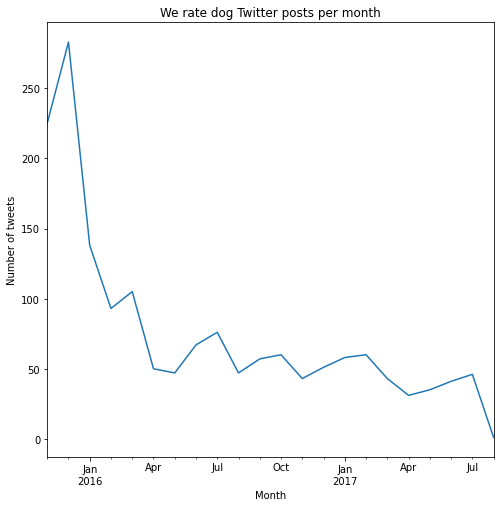

In [119]:
# Plot the trend_tweets dataframe
trend_tweets.plot(kind='line',ylabel='Number of tweets', xlabel='Month',title='We rate dog Twitter posts per month',figsize=(8,8))

A downward trend is seen in the table above, this shows that the number of tweets per month has kept on reducing.

**2. Investigate the dog stage with the hihest retweet and favourite counts.**

<AxesSubplot: title={'center': 'Average favorite counts by stages of dogs'}, xlabel='stage'>

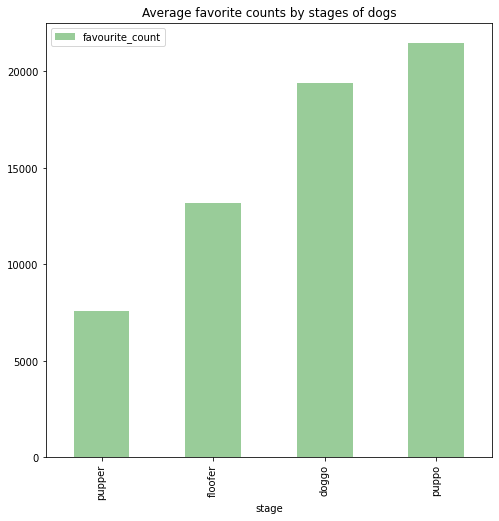

In [120]:
# Investigate the favourite counts
df_stages = df.query('dog_stage !=""')
df_stages = pd.DataFrame(df_stages.groupby('dog_stage')['favourite_count'].mean().sort_values()) 
df_stages['stage'] = df_stages.index
df_stages.plot(x="stage",y='favourite_count',kind='bar',title="Average favorite counts by stages of dogs",color='g', alpha=0.4,figsize=(8,8))

The graph above shows that the puppo has the highest favourite counts of all the dog stages.

<AxesSubplot: title={'center': 'Average favorite counts by stages of dogs'}, xlabel='stage'>

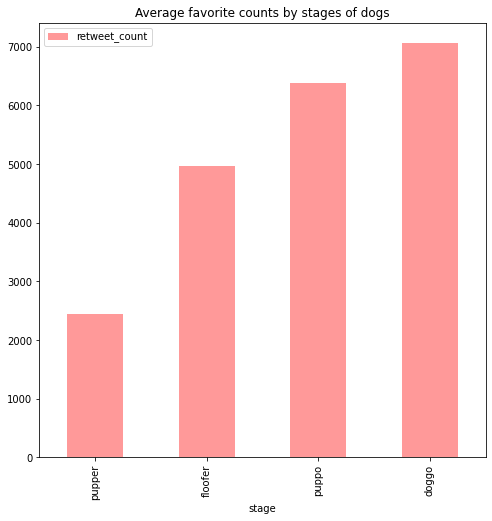

In [121]:
# Investigate the retweet counts
df_stages = df.query('dog_stage !=""')
df_stages = pd.DataFrame(df_stages.groupby('dog_stage')['retweet_count'].mean().sort_values()) 
df_stages['stage'] = df_stages.index
df_stages.plot(x="stage",y='retweet_count',kind='bar',title="Average favorite counts by stages of dogs",color='r', alpha=0.4,figsize=(8,8))

The investigation shows that the doggo on average has more retweets than all other stages of the dogs.

**3. Investigate the monthly trend of reactions to the WeRateDog's tweets**

In [122]:
# Assign the su, of the retweet and favourite counts to a series called tweet reactions
# Use the sum to find the average reactions per month
df['tweet_reactions'] = df['retweet_count'] + df['favourite_count']

In [123]:
# Group the data by timestamp and extract the tweet_activity. 
tweet_reactions_monthly = df.groupby(df['timestamp'].dt.to_period('M'))['tweet_reactions'].mean()

C:\Users\User\AppData\Local\Temp\ipykernel_39096\930215612.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  tweet_reactions_monthly = df.groupby(df['timestamp'].dt.to_period('M'))['tweet_reactions'].mean()


Text(0, 0.5, 'Tweet activity')

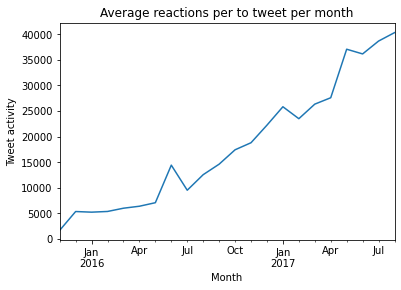

In [124]:
tweet_reactions_monthly.plot()
plt.title("Average reactions per to tweet per month")
plt.xlabel("Month")
plt.ylabel("Tweet activity")

The investigation shows that the reactions towards the tweets keeps on increasing per month.This shows a possible increase in engagement with the We rate dogs tweets.

### Insights:
1. The number of tweets posted by Weratedogs has decreased gradually. 

2. There is an increased engagement with the tweets posted on the Weratedogs account, which can be seen from the increase of favourites and retweets of the tweets.

3. The doggo and Puppo dog stages are the most retweeted and favourited dog stages. This shows a potential liking of the dog stage by majority of the people that interact with the tweets.